# SubConjunto de varaibles para clasificacion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('datos_limpia_codifcada.csv')

In [3]:
df2=df[["PORCENTAJE\n%", "GRADO O CURSO\n2023 2024"
                      , "TIPOD_AUDITIVA",	"TIPOD_FISICA",	"TIPOD_INTELECTUAL",	"TIPOD_NINGUNA",
"TIPOD_PSICOSOCIAL",	"TIPOD_VISUAL"]]
df2

,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,TIPOD_AUDITIVA,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL
0,0.36,0,0,0,1,0,0,0
1,0.36,0,0,0,1,0,0,0
2,0.00,0,0,0,0,1,0,0
3,0.36,1,0,0,1,0,0,0
4,0.85,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
181,0.35,10,0,0,1,0,0,0
182,0.45,13,0,0,1,0,0,0
183,0.58,2,0,0,0,0,0,1
184,0.30,11,0,1,0,0,0,0


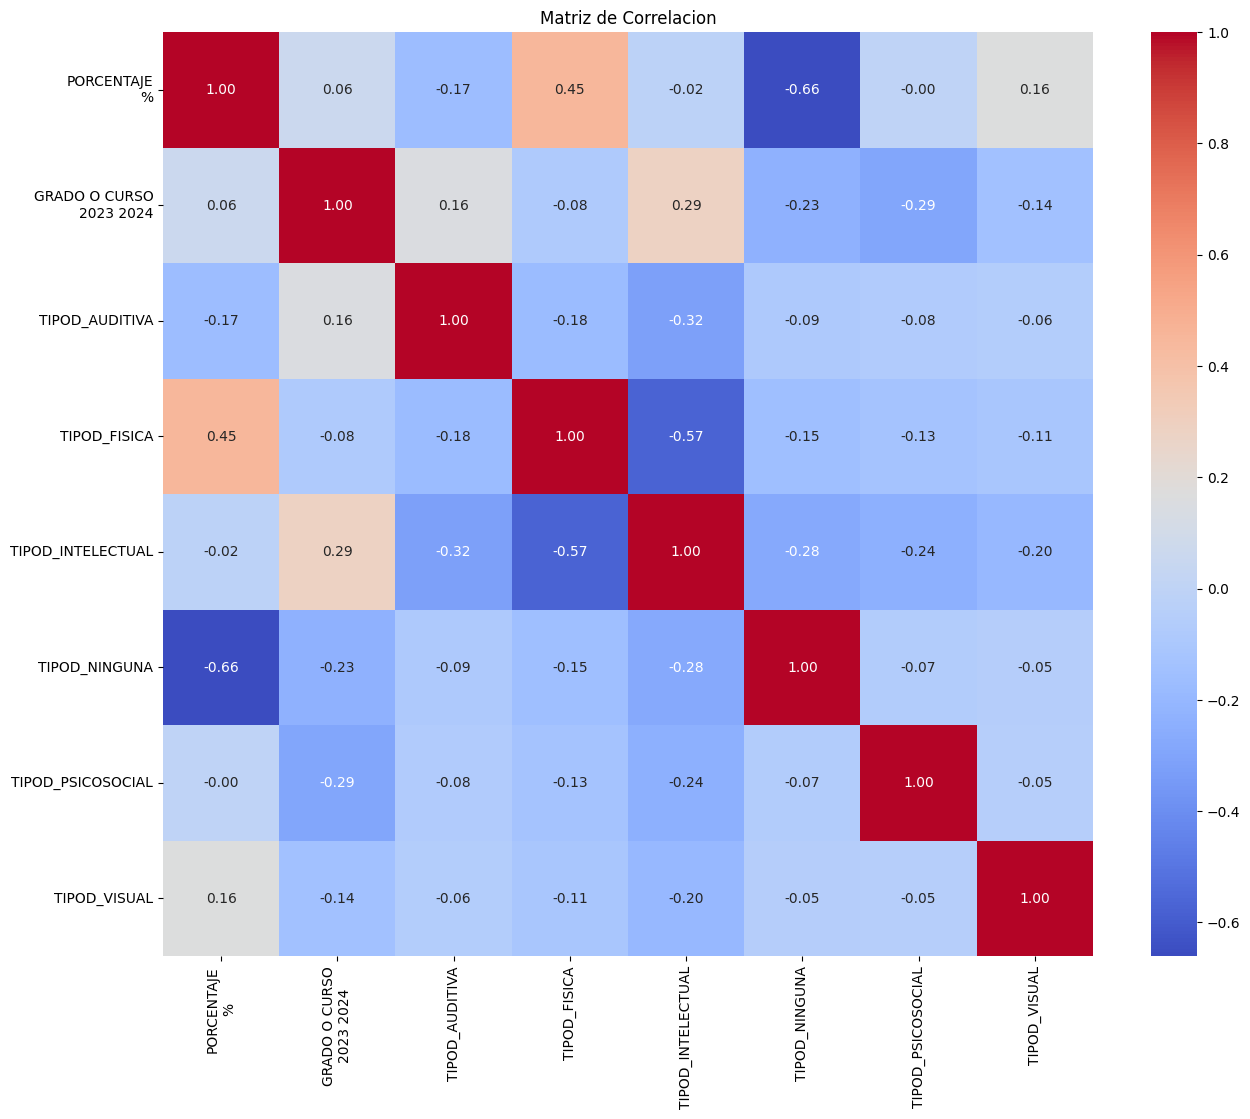

In [4]:
cov_matrix = df2.corr()
# Crear el mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlacion')
plt.show(block=True)

In [5]:
from sklearn import preprocessing

df2_z = pd.DataFrame(preprocessing.scale(df2), 
                             columns = df2.columns)

In [6]:
df2_z.describe()

,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,TIPOD_AUDITIVA,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL
count,1.860000e+02,186.000000,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02
mean,-1.719055e-16,0.000000,-2.865092e-17,-1.074409e-17,-6.685214e-17,3.820122e-17,-6.685214e-17,-1.193788e-17
std,1.002699e+00,1.002699,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00,1.002699e+00
min,-2.409170e+00,-2.266404,-3.171620e-01,-5.649327e-01,-1.010811e+00,-2.741250e-01,-2.383656e-01,-1.977527e-01
25%,-5.612581e-01,-0.912675,-3.171620e-01,-5.649327e-01,-1.010811e+00,-2.741250e-01,-2.383656e-01,-1.977527e-01
50%,-9.928005e-02,0.170308,-3.171620e-01,-5.649327e-01,9.893045e-01,-2.741250e-01,-2.383656e-01,-1.977527e-01
75%,8.316056e-01,0.711799,-3.171620e-01,-5.649327e-01,9.893045e-01,-2.741250e-01,-2.383656e-01,-1.977527e-01
max,1.979621e+00,1.253291,3.152963e+00,1.770122e+00,9.893045e-01,3.647971e+00,4.195235e+00,5.056820e+00


In [7]:
wss = (df2_z.shape[0]-1)*np.sum(df2_z.apply(np.var, axis=0))
wss

1480.0

In [8]:
K = range(1, 15)

In [9]:
kMeans = [KMeans(n_clusters=k, random_state=1234).fit(df2_z.values) for k in K]
kMeans_centroids = [iteration.cluster_centers_ for iteration in kMeans]
#kMeans_centroids

In [10]:
# For example, we may access specific co-ordinates of centroids for each cluster
# within a 3-cluster arrangement of the data:
kMeans_centroids[2].shape # each row of the array represents co-ordinates of a centroid

(3, 8)

In [11]:
k_dist = [cdist(df2_z.values, centroids, metric='euclidean') for centroids in kMeans_centroids]
#k_dist[2] # each value represents summed Euclidean distances from a specific data point to a centroid

In [12]:
min_dist = [np.min(distance, axis=1) for distance in k_dist]
min_dist[2][:10] # the first 10 shortest distances for the 3-cluster assignment

array([2.68113601, 2.68113601, 1.4162088 , 2.42977759, 2.0088104 ,
       4.99522659, 1.145463  , 2.41794503, 5.1816502 , 1.65512618])

In [13]:
wcss = np.array([sum(d**2) for d in min_dist])
wcss

array([1488.        , 1175.77341546,  889.48915625,  657.63319197,
        419.42339386,  217.1167696 ,  179.37494602,  124.64298638,
         97.71894563,   90.65523993,   87.44642785,   73.68407344,
         68.92864691,   63.40659334])

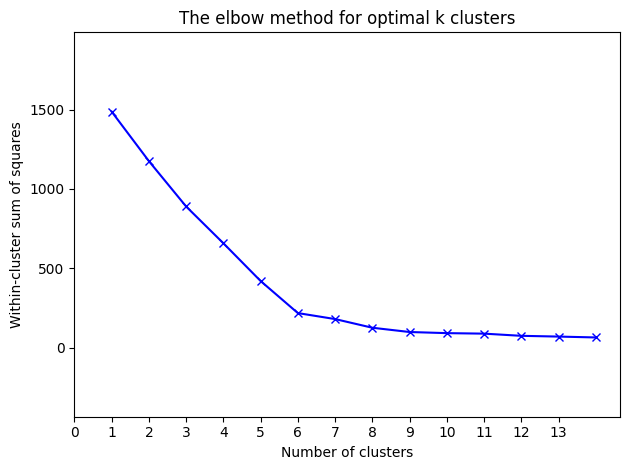

In [14]:
# The drop of the within clusters sums of squares can be plotted:
plt.plot(K, wcss, 'bx-')
plt.xlabel("Number of clusters")
plt.xticks(range(0,14))
plt.ylabel("Within-cluster sum of squares")
plt.ylim(wcss.min()-500, wcss.max()+500)
plt.title("The elbow method for optimal k clusters")
plt.tight_layout()

In [15]:
# 8. In k-means clustering our objective is to minimise total within-cluster sum of squares
# and maximise between clusters sum of squares.
# Setting multiple initial random assignments may improve the clustering. 

means2 = (KMeans(n_clusters=4, random_state=1234, 
                 init='random', n_init=50)
            .fit(df2_z.values))
means2

KMeans(init='random', n_clusters=4, n_init=50, random_state=1234)

In [16]:
# Calculating within clusters sum of squares for the 'means2' cluster assignment:
wcss_means2 = sum(np.min(cdist(df2_z.values, means2.cluster_centers_), axis=1)**2)
wcss_means2 #2309.3 (vs 2310.3 previously)

# n_init=50 did not change much in this case. 
# Setting 'n_init' to higher values e.g. 100 or 150 may help, but then the 'max_iter' argument 
# has to be adjusted to allow more iterations and convergence of the algorithm. 
# In this case, it is more recommended to use a faster method with just n_init=1.
# Remember that the higher 'n_init' and 'max_iter', 
# the longer time spent on algorithm computation.

637.0856152097763

In [17]:
# First, create a copy of the z-score standardised data and add
# a new variable 'cluster' with labels of the cluster assignment:
df2_z_copy = df2_z.copy()
df2_z_copy['cluster'] = pd.Series(means2.labels_, index = df2_z.index)
df2_z_copy

,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,TIPOD_AUDITIVA,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL,cluster
0,-0.746049,-2.266404,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,2
1,-0.746049,-2.266404,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,2
2,-2.409170,-2.266404,-0.317162,-0.564933,-1.010811,3.647971,-0.238366,-0.197753,0
3,-0.746049,-1.995659,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,2
4,1.517643,-1.995659,-0.317162,1.770122,-1.010811,-0.274125,-0.238366,-0.197753,3
...,...,...,...,...,...,...,...,...,...
181,-0.792247,0.441054,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,2
182,-0.330269,1.253291,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753,2
183,0.270302,-1.724913,-0.317162,-0.564933,-1.010811,-0.274125,-0.238366,5.056820,3
184,-1.023236,0.711799,-0.317162,1.770122,-1.010811,-0.274125,-0.238366,-0.197753,3


In [18]:
df2_z_copy.iloc[:,:8]

,PORCENTAJE\n%,GRADO O CURSO\n2023 2024,TIPOD_AUDITIVA,TIPOD_FISICA,TIPOD_INTELECTUAL,TIPOD_NINGUNA,TIPOD_PSICOSOCIAL,TIPOD_VISUAL
0,-0.746049,-2.266404,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753
1,-0.746049,-2.266404,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753
2,-2.409170,-2.266404,-0.317162,-0.564933,-1.010811,3.647971,-0.238366,-0.197753
3,-0.746049,-1.995659,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753
4,1.517643,-1.995659,-0.317162,1.770122,-1.010811,-0.274125,-0.238366,-0.197753
...,...,...,...,...,...,...,...,...
181,-0.792247,0.441054,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753
182,-0.330269,1.253291,-0.317162,-0.564933,0.989305,-0.274125,-0.238366,-0.197753
183,0.270302,-1.724913,-0.317162,-0.564933,-1.010811,-0.274125,-0.238366,5.056820
184,-1.023236,0.711799,-0.317162,1.770122,-1.010811,-0.274125,-0.238366,-0.197753


In [19]:
pca_means2 = PCA(n_components=2).fit(df2_z_copy.iloc[:,:8])
pca_2d_means2 = pca_means2.transform(df2_z_copy.iloc[:,:8])
pca_2d_means2.shape

(186, 2)

In [20]:
sum(pca_means2.explained_variance_ratio_) 

0.46684928312996055

<Axes: >

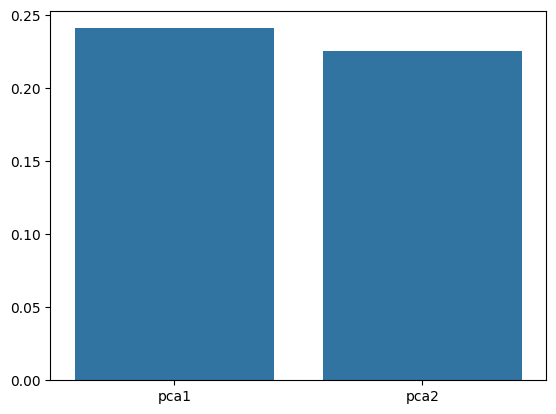

In [21]:
sns.barplot(x=['pca1','pca2'],y=pca_means2.explained_variance_ratio_)

In [22]:
 df2_z_copy.cluster.unique()

array([2, 0, 3, 1])

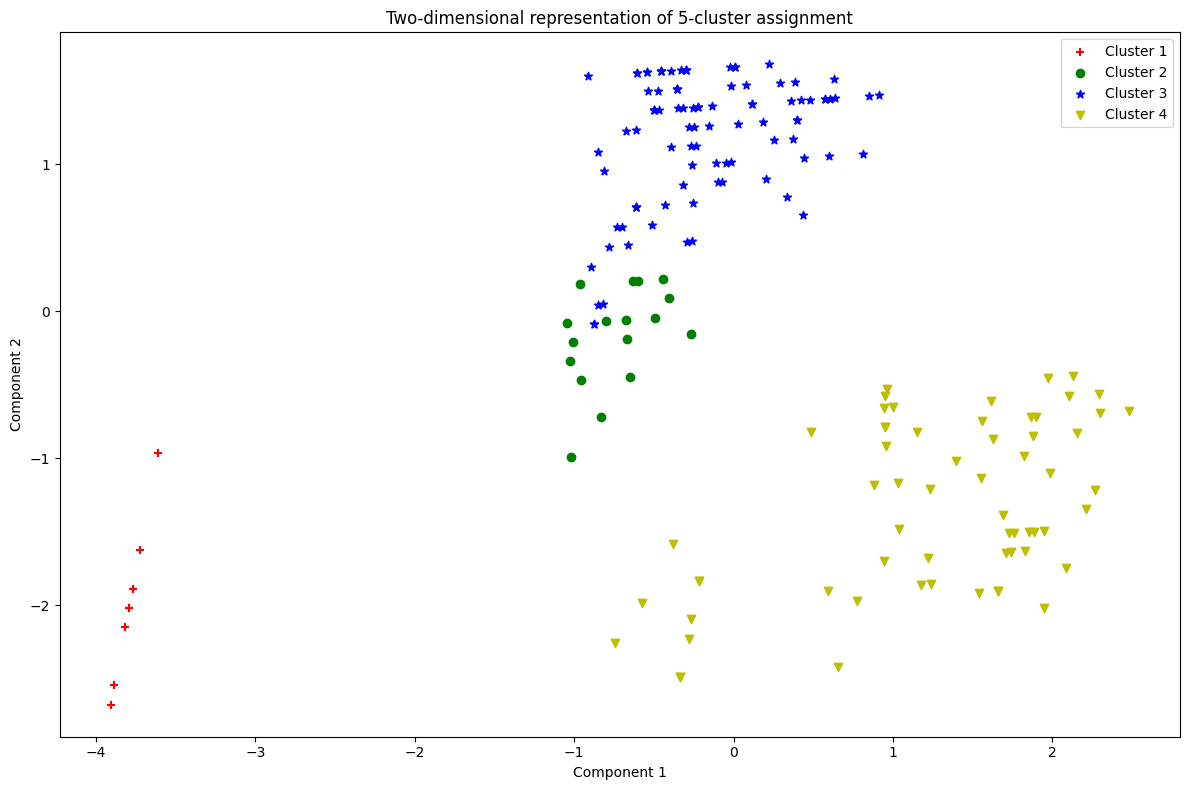

In [24]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

for i in range(0, pca_2d_means2.shape[0]):
    if df2_z_copy.cluster[i] == 0:
        c1 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='r', marker='+')
    elif df2_z_copy.cluster[i] == 1:
        c2 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='g', marker='o')
    elif df2_z_copy.cluster[i] == 2: 
        c3 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='b', marker='*')
    elif df2_z_copy.cluster[i] == 3: 
        c4 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='y', marker='v')
   # elif df2_z_copy.cluster[i] == 4: 
    #    c5 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='c', marker='s') 
    #elif df2_z_copy.cluster[i] == 5: 
     #   c6 = pl.scatter(pca_2d_means2[i,0], pca_2d_means2[i,1], c='k', marker='p') 
        
pl.legend([c1, c2, c3,c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6'])
pl.title('Two-dimensional representation of 5-cluster assignment')
pl.xlabel('Component 1')
pl.ylabel('Component 2')
pl.tight_layout()

In [26]:
pca_means2_3d = PCA(n_components=3).fit(df2_z_copy.iloc[:,:8])
pca_3d_means2 = pca_means2_3d.transform(df2_z_copy.iloc[:,:8])
pca_3d_means2.shape

(186, 3)

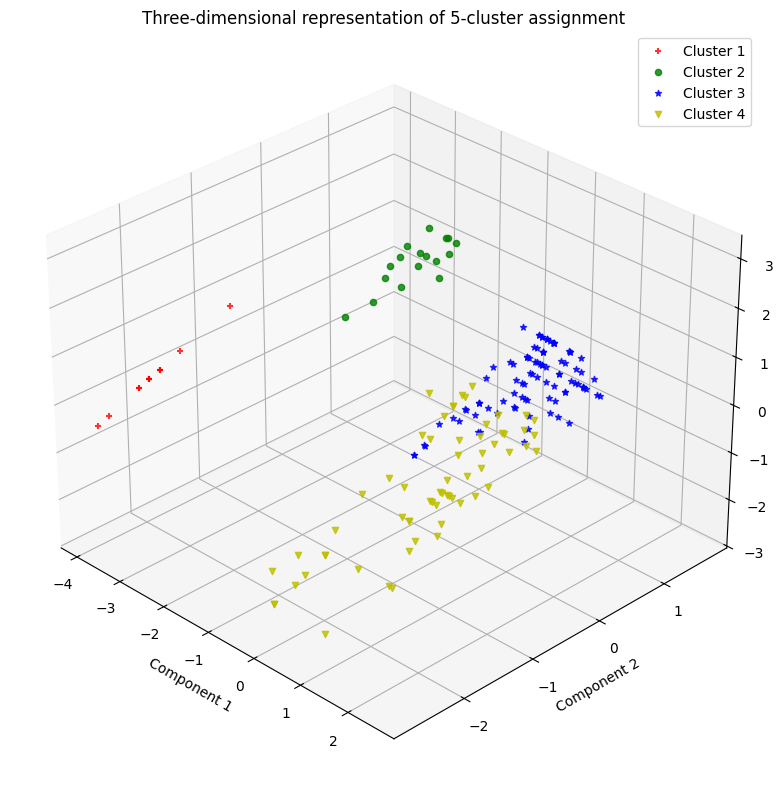

In [27]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(0, pca_3d_means2.shape[0]):
    if df2_z_copy.cluster[i] == 0:
        c1 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='r', marker='+', alpha = 0.8)
    elif df2_z_copy.cluster[i] == 1:
        c2 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='g', marker='o', alpha = 0.8)
    elif df2_z_copy.cluster[i] == 2: 
        c3 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='b', marker='*', alpha = 0.8)
    elif df2_z_copy.cluster[i] == 3: 
        c4 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='y', marker='v', alpha = 0.8)
   
   # elif df2_z_copy.cluster[i] == 4: 
    #    c5 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='c', marker='s', alpha = 0.8) 
   # elif df2_z_copy.cluster[i] == 5: 
     #   c6 = ax.scatter(pca_3d_means2[i,0], pca_3d_means2[i,1], pca_3d_means2[i,2], color='k', marker='p', alpha = 0.8)    
plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
ax.set_title('Three-dimensional representation of 5-cluster assignment')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.tight_layout()


In [28]:
df['cluster'] = pd.Series(means2.labels_, index = df.index)

In [29]:
df.to_csv('datos_sub_clusterizados.csv', index=False)